# Rekall Tutorial: Cyclist Detection

In this tutorial, you'll learn how to use Rekall to detect a new class of objects (cyslists) from existing person and bicycle detections from Mask R-CNN.

Let's first import Rekall and a few of its important classes:

In [1]:
%load_ext autoreload
%autoreload 2
from rekall import Interval, IntervalSet, IntervalSetMapping, Bounds3D
from rekall.predicates import *

For this tutorial, we'll provide some helpers to handle data loading videos and pre-computed object detections from our servers. Run this cell to load in those helpers:

In [2]:
from cyclist_tutorial_helpers import *

And now let's load up the pre-computed bounding box detections:

In [3]:
bboxes = get_maskrcnn_bboxes()

In [4]:
bboxes.keys()

dict_keys([0, 3])

We can use the `visualize_helper` function to visualize these bounding boxes. Click on the video to expand it, and play the video by hovering over it and using `;`. You can navigate through the video by clicking through the timeline, and using the `+` and `-` buttons to zoom in or out.

In [5]:
bboxes[3].get_intervals()[:10]

[<Interval t1:1.0 t2:1.1 x1:0.9520519213591989 x2:0.9992879231770834 y1:0.18309134928385418 y2:0.38728181966145836 payload:{'class': 'elephant', 'score': 0.7092806100845337, 'spatial_type': <vgrid.spatial_type.SpatialType_Bbox object at 0x0000022D215CFD00>}>,
 <Interval t1:2.5 t2:2.6 x1:0.8846395249911937 x2:0.9052875905797102 y1:0.6124517822265625 y2:0.7083091634114583 payload:{'class': 'frisbee', 'score': 0.7335711717605591, 'spatial_type': <vgrid.spatial_type.SpatialType_Bbox object at 0x0000022D215CFE20>}>,
 <Interval t1:2.5 t2:2.6 x1:0.9103485942846719 x2:0.9439891870471014 y1:0.5886897786458334 y2:0.881246826171875 payload:{'class': 'person', 'score': 0.7251530885696411, 'spatial_type': <vgrid.spatial_type.SpatialType_Bbox object at 0x0000022D215CFF40>}>,
 <Interval t1:11.5 t2:11.6 x1:0.05118782547169069 x2:0.09615725825950143 y1:0.32522682698567706 y2:0.37818359375 payload:{'class': 'car', 'score': 0.9560763239860535, 'spatial_type': <vgrid.spatial_type.SpatialType_Bbox object a

In [6]:
visualize_helper([bboxes])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xcc\xbd\xdb\xae&K\x92\x9c\xf7*D_\x0bB\x9c\x0f\xba\…

# Filtering on Payload
Let's give a preview of some of the things you'll be able to do with Rekall. In the above two cells we've loaded up bounding box detections over two videos, and visualized them for you.

Let's start by filtering the bounding box detections by class to look at bicycle and person detections:

In [21]:
bikes = bboxes.filter(lambda interval: interval['payload']['class'] == 'bicycle')
person = bboxes.filter(lambda interval: interval['payload']['class'] == 'person')

And now let's visualize them:

In [22]:
visualize_helper([bikes, person])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xd4\x9d\xcb\xae,Ir]\x7f\x85\xa81\xd1\xf0\xf7CC\xfd…

In [23]:
# Try some payload filtering functions yourself here!
print(f'{len(person[0])}, {len(bikes[0])}')
print(f'{len(person[3])}, {len(bikes[3])}')

import time
t = time.time()
bikes = bikes.coalesce(
    ('t1', 't2'),
    bounds_merge_op=Bounds3D.span,
    payload_merge_op=lambda payload1, payload2: {"score": max(payload1['score'], payload2['score']), "class":payload1['class']},
    predicate=and_pred(
        lambda intrvl1, intrvl2: intrvl1['payload']['class'] == intrvl2['payload']['class'],
        Bounds3D.X(overlaps()),
        Bounds3D.Y(overlaps())
    ),
    epsilon=0
)
person = person.coalesce(
    ('t1', 't2'),
    bounds_merge_op=Bounds3D.span,
    payload_merge_op=lambda payload1, payload2: {"score": max(payload1['score'], payload2['score']), "class":payload1['class']},
    predicate=and_pred(
        lambda intrvl1, intrvl2: intrvl1['payload']['class'] == intrvl2['payload']['class'],
        and_pred(
        Bounds3D.X(overlaps()),
        Bounds3D.Y(overlaps()))
    ) ,
    epsilon=0
)
t = time.time() - t
print("Time cost: ", t)

print(f'{len(person[0])}, {len(bikes[0])}')
print(f'{len(person[3])}, {len(bikes[3])}')

3927, 1625
369, 50
Time cost:  0.24300336837768555
635, 97
142, 14


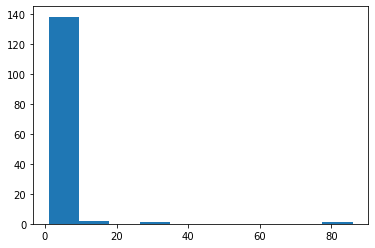

[1.0000000000000009,
 0.9999999999999964,
 0.9999999999999787,
 0.9999999999999787,
 1.0000000000000142,
 1.0000000000000142,
 4.000000000000057,
 27.00000000000003,
 1.0000000000000853,
 1.0000000000000853,
 1.0000000000000853,
 0.9999999999999432,
 2.0000000000000284,
 1.0000000000000853,
 0.9999999999999432,
 0.9999999999999432,
 2.0000000000000284,
 0.9999999999999432,
 1.9999999999998863,
 0.9999999999999432,
 0.9999999999999432,
 1.0000000000002274,
 1.0000000000002274,
 0.9999999999996589,
 0.9999999999996589,
 1.0000000000002274,
 1.0000000000002274,
 1.0000000000002274,
 1.0000000000002274,
 1.0000000000002274,
 1.0000000000002274,
 0.9999999999996589,
 1.0000000000002274,
 1.0000000000002274,
 0.9999999999996589,
 1.0000000000002274,
 0.9999999999996589,
 1.0000000000002274,
 1.0000000000002274,
 1.0000000000002274,
 0.9999999999996589,
 2.0000000000004547,
 86.00000000000023,
 0.9999999999996589,
 1.0000000000002274,
 1.0000000000002274,
 1.9999999999998863,
 1.0000000000002

In [24]:
person_len = [10*intrvl.size() for intrvl in person[3].get_intervals()]
import matplotlib.pyplot as plt

plt.hist(person_len)
plt.show()
person_len

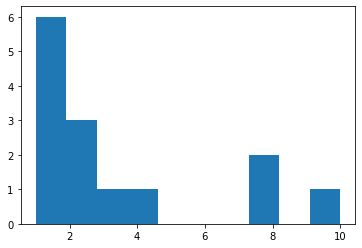

[2.0000000000000284,
 7.999999999999972,
 0.9999999999999432,
 1.0000000000000853,
 0.9999999999999432,
 1.0000000000002274,
 0.9999999999996589,
 1.0000000000002274,
 2.9999999999995453,
 7.999999999999545,
 3.9999999999997726,
 1.9999999999998863,
 10.0,
 1.9999999999998863]

In [25]:
bikes_len = [10*intrvl.size() for intrvl in bikes[3].get_intervals()]
import matplotlib.pyplot as plt

plt.hist(bikes_len)
plt.show()
bikes_len

In [26]:
visualize_helper([
    bikes.filter(lambda interval: interval['t1'] < 300),
    person.filter(lambda interval: interval['t1'] < 300)
])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xcd\x9dK\x8f]\xd7\x91\xa5\xffJC=m\xc8\xfb\xfd\xa8A…

In [9]:
# Try some bounds filtering functions yourself here!


# Rekall's Data Model

Now that we have a flavor of what we can do with Rekall, let's build our understanding of the data representation from the ground up. Let's first understand what `Interval`s are - these are the fundamental data structure that we use to represent any annotations in videos.

Here's a figure demonstrating what these Intervals can look like:

![video_volume_v2.png](https://storage.googleapis.com/esper/dan_olimar/rekall_tutorials/videovolume_v2.png)

Intervals are parameterized by a Bounds object (`Bounds3D` in all the intervals above), and an optional payload (face identities, word in the caption, or nested Intervals in the figure above):

```Python
# This interval has time bounds from 0 to 10 seconds, X bounds from 0.5 to 0.7 (frame-relative),
# and Y bounds from 0.6 to 0.9 (frame-relative)
new_interval = Interval(Bounds3D(
    t1 = 0,
    t2 = 10,
    x1 = 0.5,
    x2 = 0.7,
    y1 = 0.6,
    y2 = 0.9
))

# This interval has time bounds from 5 to 15 seconds, and default X and Y bounds of the whole
# frame (0 to 1 for both X and Y)
new_interval2 = Interval(Bounds3D(5, 15))

# This interval has a payload. The payload can be an arbitrary object.
new_interval3 = Interval(Bounds3D(0, 1), payload={ 'class': 'my first payload' })
                         
# We can access the co-ordinates of payload and an Interval directly
print(new_interval['t1'], new_interval['t2'], new_interval['x1'])
print(new_interval2['t1'], new_interval2['x1'])
print(new_interval3['payload'])
print(new_interval3['payload']['class'])
```

Try it yourself below!

**NB: If you're coming from the paper/tech report, the words "Label" are "Interval" are interchangeable in the code.**

In [10]:
# This interval has time bounds from 0 to 10 seconds, X bounds from 0.5 to 0.7 (frame-relative),
# and Y bounds from 0.6 to 0.9 (frame-relative)
new_interval = Interval(Bounds3D(
    t1 = 0,
    t2 = 10,
    x1 = 0.5,
    x2 = 0.7,
    y1 = 0.6,
    y2 = 0.9
))

# This interval has time bounds from 5 to 15 seconds, and default X and Y bounds of the whole
# frame (0 to 1 for both X and Y)
new_interval2 = Interval(Bounds3D(5, 15))

# This interval has a payload. The payload can be an arbitrary object.
new_interval3 = Interval(Bounds3D(0, 1), payload={ 'class': 'my first payload' })

# We can access the co-ordinates of payload and an Interval directly
print(new_interval['t1'], new_interval['t2'], new_interval['x1'])
print(new_interval2['t1'], new_interval2['x1'])
print(new_interval3['payload'])
print(new_interval3['payload']['class'])

0 10 0.5
5 0.0
{'class': 'my first payload'}
my first payload


In [11]:
# Create some Intervals yourself here!


# Associating Intervals with Events
In Rekall, we use *sets* of Intervals to represent events in videos. A single `IntervalSet` contains all occurrences of an event in a single video (all the bounding box detections, all the cyclist annotations, etc).

We can create an `IntervalSet` by passing in a list of `Interval`s:

```Python
# This IntervalSet represents all occurrences of a "made up" event in a video
my_first_intervalset = IntervalSet([
    Interval(Bounds3D(0, 10), payload = { 'class': 'made up'} ),
    Interval(Bounds3D(20, 30), payload = { 'class': 'made up'} ),
])
```

In [12]:
my_first_intervalset = IntervalSet([
    Interval(Bounds3D(0, 10), payload = { 'class': 'made up'} ),
    Interval(Bounds3D(20, 30), payload = { 'class': 'made up'} ),
])

One last thing - we want to associate each `IntervalSet` with the right video. We might have detected bikes in one video, but not the other!

We use `IntervalSetMapping` to associate `IntervalSet`s with different videos by keys. We create an `IntervalSetMapping` by passing in a `dict` from 

```Python
my_first_ism = IntervalSetMapping({
    0: IntervalSet(...), # the IntervalSet for video 0
    2: IntervalSet(...) # the IntervalSet for video 2
})
```

`bboxes` is an `IntervalSetMapping` object that we pre-loaded with `Interval`s containing object detections from Mask-RCNN.

Similarly, `bikes` and `person` are `IntervalSetMapping` objects representing the event that a bicycle object or a person object was detected in the video.

We can look at the keys of one of the `IntervalSetMapping` objects to see what the keys in our videos are!

In [13]:
bboxes.keys()

dict_keys([0, 3])

The videos that we were looking at before have keys 0 and 3. The visualization shows the videos in sorted order, so we know that the first video is video 0, and the second video is video 3.

Now we can create a simple `IntervalSetMapping` and visualize it:

In [14]:
my_first_ism = IntervalSetMapping({
    0: my_first_intervalset,
    3: IntervalSet([Interval(Bounds3D(50, 60, 0.5, 0.8, 0.1, 0.3)), Interval(Bounds3D(100,200))])
})

In [15]:
visualize_helper([my_first_ism])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xcdTM\x8f\x9b0\x10\xfd++z\xad\xc0\xe4k\xb79\xec\xa…

Now try it yourself below! Create some new `IntervalSetMapping` objects and visualize them on our videos.

**NB: if you try to visualize an `IntervalSet` with only a single Interval in it, the timeline may not appear until you click on the video.**

In [16]:
# Try it yourself!


# Checkpoint: check on your understanding

At this point, you should be familiar with a few concepts:
* We represent events in videos as *sets* of intervals - objects that are defined by a Bounds object and an optional payload
* An `IntervalSet` represents all the occurrences of a particular event in a single video
* An `IntervalSetMapping` organizes multiple `IntervalSet`s and associates each one with a different video

Since we told you that `bboxes_cydet` and `cyclist_gt` are `IntervalSetMapping` objects, you may have also surmised that we have some functions for manipulating these sets of intervals - we've already looked at a few examples of the `filter` function. But now that we know more about the underlying data representation, we can take a closer look at `filter`.

From the [documentation](https://rekallpy.readthedocs.io/en/latest/index.html#rekall.IntervalSet.filter):

```Python
def filter(self, predicate):
    """
    Filter the set and keep intervals that pass the predicate.
    
    Args:
        predicate: A function that takes an Interval and returns a bool.
        
    Returns:
        A new IntervalSet which is the filtered set.
    """
```

So `filter` expects a function that will take an `Interval` and return `True` or `False`. It runs the predicate function on every interval, and only keeps the ones where the predicate returns `True`.

Notice that the documentation says that `filter` returns a new `IntervalSet` - that's because it's actually a function on `IntervalSet`! `IntervalSetMapping` simply reflects all the functions in `IntervalSet` and applies the functions to every `IntervalSet`. So even though we wrote the function over `IntervalSet`s, we can run them on `IntervalSetMapping` objects like `bboxes_cydet` and `cyclist_gt`.

## Checkpoint exercise: duplicate certain labels across the entirety of a video
Let's go through a simple exercise to check your understanding of these concepts.

We'll define a simple `IntervalSetMapping` with a few objects. We'll want you to duplicate the Intervals at time 0 of video 0 throughout videos 0 and 3, but only if the class in their payload is `car`.

In [17]:
objects_to_duplicate = IntervalSetMapping({
    0: IntervalSet([
        Interval(Bounds3D(0, 10, 0.1, 0.3, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(0, 10, 0.4, 0.6, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(0, 10, 0.7, 0.9, 0.1, 0.9), payload={ 'class': 'godzilla' }),
        Interval(Bounds3D(10, 20, 0.1, 0.3, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(10, 20, 0.4, 0.6, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(10, 20, 0.7, 0.9, 0.1, 0.9), payload={ 'class': 'godzilla' })
    ]),
    3: IntervalSet([
        Interval(Bounds3D(0, 10, 0.2, 0.4, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(0, 10, 0.5, 0.7, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(0, 10, 0.75, 0.95, 0.1, 0.9), payload={ 'class': 'godzilla' }),
        Interval(Bounds3D(10, 20, 0.2, 0.4, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(10, 20, 0.5, 0.7, 0.1, 0.9), payload={ 'class': 'car' }),
        Interval(Bounds3D(10, 20, 0.75, 0.95, 0.1, 0.9), payload={ 'class': 'godzilla' })
    ])
})

In particular, we'll want the resulting Intervals to have the following properties:
* You should have Intervals with time extents of (0, 10), (10, 20), (20, 30), etc.
* The Intervals should have the same X/Y extent and payload as the Intervals at *time 0* of video 0 that have payload 'car'.
* The Intervals should cover the entire video.

A few hints to get you started:
* You can access `IntervalSet 0` of `objects_to_duplicate` like this: `objects_to_duplicate[0]`.
* You can loop through all the video keys of `objects_to_duplicate` using an iterator: `[k for k in objects_to_duplicate]`.
* You can filter down to Intervals that start at time 0 like this: `objects_to_duplicate.filter(lambda interval: interval['t0'] == 0)`
* You can access all the Intervals in an `IntervalSet` like this: `objects_to_duplicate[0].get_intervals()`. This will return a list of Intervals sorted by time.
* For example, to get the t2 value of the last interval in `bboxes_cydet`: `bboxes_cydet[0].get_intervals()[-1]['t2']`
* You can access the bounds of an interval like so: `interval['bounds']`
* You can copy a bounds like so: `interval['bounds'].copy()`
* Remember you can use Python ranges to get a value every ten seconds: `range(0, end, 10)`

In [18]:
# Construct an IntervalSetMapping with the answer here!


## Exercise solution:

Example solution to this exercise - don't look if you haven't tried it!

```Python
objects_at_start = objects_to_duplicate[0].filter(
    lambda interval: interval['t1'] == 0 and interval['payload']['class'] == 'car'
).get_intervals()

video_lengths = {
    key: bboxes_cydet[key].get_intervals()[-1]['t2']
    for key in bboxes_cydet
}

objects_duplicated = IntervalSetMapping({
    key: IntervalSet([
        Interval(Bounds3D(
            t1 = t,
            t2 = t + 10,
            x1 = interval['x1'],
            x2 = interval['x2'],
            y1 = interval['y1'],
            y2 = interval['y2']
        ))
        for t in range(0, int(video_lengths[key]), 10)
        for interval in objects_at_start
    ])
    for key in bboxes_cydet
})

visualize_cydet([objects_duplicated])
```

# Defining New Events through Composition and Manipulation Functions for Cyclist Detection

Now that we have that basic understanding of Rekall's data representation, let's look at some more complex manipulation functions to try to make a cyclist detector.

First, let's look at the [`join`](https://rekallpy.readthedocs.io/en/latest/index.html#rekall.IntervalSet.join) function. This function computes the cross product of two `IntervalSet`s, filters the resulting pairs by a predicate, and then merges the resulting pairs back into a single `Interval` using a merge operation:

![simple_join.png](https://olimar.stanford.edu/hdd/rekall_tutorials/simple_join.png)

Here's an example of using a `join` operation to create an `IntervalSetMapping` object containing instances of a `person` bounding box overlapping with a `bicycle` bounding box.
```Python
person_intersect_bike = person.join(
    bikes,
    predicate = and_pred(
        Bounds3D.T(equal()),
        Bounds3D.X(overlaps()),
        Bounds3D.Y(overlaps())
    ),
    merge_op = lambda interval1, interval2: Interval(
        interval1['bounds'].span(interval2['bounds'])
    ),
    window = 0.0,
    progress_bar = True
)
```

This function joins `person` and `bikes`. The predicate expects a function of the following format:
```Python
def predicate(interval1, interval2):
    # return True or False
```

We provide a number of spatial and temporal predicates in Rekall, outlined [here](https://rekallpy.readthedocs.io/en/latest/source/rekall.predicates.html). In this case, we're only keeping pairs of (person detection, bike detection) if they have the same time bounds (`Bounds3D.T(equal())`), and the `X` and `Y` bounds overlap (`Bounds3D.X(overlaps())`, `Bounds3D.Y(overlaps())`). The `and_pred` wrapper takes in an arbitrary number of predicates and makes sure that all of them pass.

The `merge_op` expects a function of this form:
```Python
def merge_op(interval1, interval2):
    # return a new Interval
```

In this case, we are returning a new Interval whose bounds span both the Intervals in the pair - basically, the minimum bounding box that covers both of them.

We pass in a `window` of `0.0` - this is an optimization that limits the pairs in the cross product to only those Intervals whose time bounds are apart from each other by `window` or less time. A `window` value of `0` limits the pairs to only those that overlap. Since we're already filtering by that in the time dimension, we know that this optimization won't change our results.

Finally, we pass `progress_bar=True` just to visualize a progress bar while we wait for this computation to complete (there are a lot of detections to process).

Let's run this function and visualize the results below!

In [18]:
# Use the join above to construct bounding boxes where a person and bike overlap!
import time
t = time.time()
person_intersect_bike = person.join(
    bikes,
    predicate = and_pred(
        Bounds3D.T(equal()),
        Bounds3D.X(overlaps()),
        Bounds3D.Y(overlaps())
    ),
    merge_op = lambda interval1, interval2: Interval(
        interval1['bounds'].span(interval2['bounds'])
    ),
    window = 0.0,
    progress_bar = True
)
t = time.time() - t

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.67s/it]


In [19]:
print("Time cost: ", t)

Time cost:  11.363000631332397


In [20]:
visualize_helper([person_intersect_bike, bikes, person])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xd4\x9d\xcb\xae\xa4\xc9u\x9d_\xc5\xe0\xd8 \xe2~\xf…

In [21]:
visualize_helper([person_intersect_bike])

VGridWidget(vgrid_spec={'compressed': True, 'data': b'x\x9c\xd4\x9d\xcb\xae\xa4\xc9u\x9d_\xc5\xe0\xd8 \xe2~\xf…

# Congratulations!

You've now used a simple Rekall query to detect bicyclists by composing person detections with bicycle detections.

Next, check out the parking space detection tutorial to take a deeper dive into some of Rekall's functions and detect empty parking spaces using nothing more than the outputs of an off-the-shelf object detector!